<a href="https://colab.research.google.com/github/notgian/csmodel-gr4-backup-repo/blob/main/CSMODEL_GRP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description**

## Some Necessary Imports
We first import the necessary packages and the dataset itself. For portability purposes, the dataset will be downloaded via kagglehub.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Importing the dataset via kagglehub
import kagglehub
import os

csv_path = kagglehub.dataset_download("fatemehmehrparvar/obesity-levels")
csv_file = os.listdir(csv_path)[0] # The only file downloaded is the obesity csv
csv_filepath = os.path.join(csv_path, csv_file)

obesity_df = pd.read_csv(csv_filepath)

Using Colab cache for faster access to the 'obesity-levels' dataset.


## Describing the Dataset
We then view the different properties of the dataframe to find out more about the data.

In [ ]:
obesity_df.shape

(2111, 17)

In [ ]:
obesity_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Given the shape of the dataframe, the dataset contains 2,111 rows and 17 columns. Next, we view the head of the data to view the different columns.

In [ ]:
obesity_df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


*observe the weird names for the columns. insert explanation here...*
*just describe each one at a time*

**1. Age**
  - The person's age.

**2. Gender**
- The person's gender.

**3. Height**
- The person's height.

**4. Weight**
- The person's weight.

**5. CALC**
- Categorical, " How often do you drink alcohol? "

**6. FAVC**
- Binary, " Do you eat high caloric food frequently? "

**7. FCVC**
- Integer, " Do you usually eat vegetables in your meals? "

**8. NCP**
- Continuous, " How many main meals do you have daily? "

**9. SCC**
- Binary, " Do you monitor the calories you eat daily? "

**10. SMOKE**
- Binary, " Do you smoke? "

**11. CH2O**
- Continuous, " How much water do you drink daily? "

**12. family_history_with_overweight**
- Binary, " Has a family member suffered or suffers from overweight? "

**13. FAF**
- Continuous, " How often do you have physical activity? "

**14. TUE**
- Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

**15. CAEC**
- Categorical, " Do you eat any food between meals? "

**16. MTRANS**
- Categorical, " Which transportation do you usually use? "

**17. NObeyesdad**
- Categorical, "Obesity level"


# Data Cleaning

In [ ]:
try:
    df = obesity_df.copy()
    print("Using existing dataframe: obesity_df")
except NameError:
    raise RuntimeError("Dataset not found. Please run the import cells first.")

Using existing dataframe: obesity_df


In [ ]:
# Check how many rows and columns
df.shape


(2111, 17)

In [ ]:
df.isnull().sum()



,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.duplicated().sum()


np.int64(24)

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Clean Column Names

In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)

df.columns

Index(['age', 'gender', 'height', 'weight', 'calc', 'favc', 'fcvc', 'ncp',
       'scc', 'smoke', 'ch2o', 'family_history_with_overweight', 'faf', 'tue',
       'caec', 'mtrans', 'nobeyesdad'],
      dtype='object')

### Fix Data Types

In [ ]:
num_cols = ['age','height','weight','fcvc','ncp','ch2o','faf','tue']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

cat_cols = [c for c in df.columns if c not in num_cols]
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip()


### Normalize Text Categories

In [ ]:
yn_map = {'yes':'yes','no':'no','Yes':'yes','No':'no','YES':'yes','NO':'no'}
level_map = {'Sometimes':'Sometimes','sometimes':'Sometimes',
             'Frequently':'Frequently','frequently':'Frequently',
             'Always':'Always','always':'Always','no':'no','No':'no'}
transport_map = {'Public_Transportation':'Public_Transportation','Automobile':'Automobile',
                 'Walking':'Walking','Bike':'Bike','Bicycle':'Bike'}

for c in ['favc','scc','smoke','family_history_with_overweight']:
    df[c] = df[c].map(yn_map).fillna(df[c])

for c in ['caec','calc']:
    df[c] = df[c].map(level_map).fillna(df[c])

df['mtrans'] = df['mtrans'].map(transport_map).fillna(df['mtrans'])
df['gender'] = df['gender'].str.capitalize().replace({'F':'Female','M':'Male'})


### Clean Target Column


In [ ]:
target_order = [
    'Insufficient_Weight','Normal_Weight',
    'Overweight_Level_I','Overweight_Level_II',
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
]

df['nobeyesdad'] = (
    df['nobeyesdad']
      .str.replace(' ', '_')
      .astype('category')
      .cat.set_categories(target_order, ordered=True)
)


### Remove Duplicates & Handle Outliers



In [ ]:
df = df.drop_duplicates()

df.loc[(df['height'] < 1.2) | (df['height'] > 2.2), 'height'] = np.nan
df.loc[(df['weight'] < 30) | (df['weight'] > 250), 'weight'] = np.nan
df.loc[(df['age'] < 10) | (df['age'] > 90), 'age'] = np.nan

def iqr_clip(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return s.clip(lower=lo, upper=hi)

for c in num_cols:
    df[c] = iqr_clip(df[c])


### Handle Missing Values

In [ ]:
for c in df.columns:
    if df[c].dtype.kind in 'biufc':
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].replace({'nan': np.nan})
        df[c] = df[c].fillna(df[c].mode(dropna=True).iloc[0])


### Feature Engineering

In [ ]:
df['bmi'] = df['weight'] / (df['height'] ** 2)

def bmi_bucket(x):
    if pd.isna(x): return np.nan
    if x < 18.5: return 'Underweight'
    if x < 25: return 'Normal'
    if x < 30: return 'Overweight'
    return 'Obese'

df['bmi_category'] = pd.Categorical(
    df['bmi'].apply(bmi_bucket),
    categories=['Underweight','Normal','Overweight','Obese'],
    ordered=True
)

for c in ['favc','scc','smoke','family_history_with_overweight']:
    df[c + '_bin'] = df[c].map({'no':0,'yes':1}).astype('Int64')


### Save and Verify Cleaned Data

In [ ]:
out_path = Path.cwd() / "obesity_levels_clean.csv"
df.to_csv(out_path, index=False)

print("Rows, Cols:", df.shape)
print("Missing values after cleaning:\n", df.isna().sum().sum())
print(f"✅ Cleaned dataset saved to: {out_path.resolve()}")


Rows, Cols: (2087, 23)
Missing values after cleaning:
 0
✅ Cleaned dataset saved to: /content/obesity_levels_clean.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   age                                 2087 non-null   float64 
 1   gender                              2087 non-null   object  
 2   height                              2087 non-null   float64 
 3   weight                              2087 non-null   float64 
 4   calc                                2087 non-null   object  
 5   favc                                2087 non-null   object  
 6   fcvc                                2087 non-null   float64 
 7   ncp                                 2087 non-null   float64 
 8   scc                                 2087 non-null   object  
 9   smoke                               2087 non-null   object  
 10  ch2o                                2087 non-null   float64 
 11  family_history_with_overweight     

# **Exploratory Data Analysis**

In [ ]:
# Just for a more descriptive name
df_cleaned = df

# Summary statistics for Numerical Variables

df_cleaned[['age', 'weight', 'height']].agg(['max', 'min', 'mean'])

# Summary Statistics for Categorical Values (Binary)

# Summary Statistics for Categorical Values

,age,weight,height
max,35.126094,171.039767,1.978461
min,14.000000,39.000000,1.450000
mean,23.949914,86.857790,1.702673


## **EDA Q1: Does age influence obesity levels?**
In this part of our analysis, we explored the relationship between **Age** (`age`) and **Obesity Level** (`nobeyesdad`).  

Our goal was to determine whether **age plays a significant role** in the development of obesity — that is, if older individuals are more likely to belong to higher obesity categories.

#### Procedure

1. **Data Preparation**
  - We used the variable `age`, which represents the age of each individual, and `nobeyesdad`, which classifies individuals into seven weight categories — from Insufficient Weight to Obesity Type III. The goal was to analyze how age distribution varies across different obesity levels.
2. **Central Tendency**
- We computed the **mean**, **median**, and **standard deviation** of `age` for each obesity category.
This helps us identify whether older individuals are more likely to fall into higher obesity classes.

- From the summary statistics, we observed that:

    - Insufficient Weight individuals had the lowest average age (≈19.8 years).

    - **Normal Weight** and **Overweight Level I–II** categories showed a gradual increase in mean age, reaching around 26 years for Overweight Level II.

    - **Obesity Type II** had the highest mean age (≈27.9 years), indicating that obesity tends to be more prevalent among older individuals.

    - However, **Obesity Type III** showed a slightly lower mean age (≈23.5 years), which may suggest differences in lifestyle or metabolic factors among younger obese individuals.

3. **Correlation Analysis**
- We computed the Pearson correlation coefficient between **age** and **BMI**, which resulted in **r = 0.284**.
- This shows a moderate positive correlation — as **age increases, BMI tends to increase as well**.
- In other words, older individuals are generally more likely to have higher BMI values, although the relationship is not perfectly linear.

4. **Visualization**
- We visualized this relationship using a **boxplot**, which displays the distribution of **age** within each **obesity** category.
- The plot clearly shows an upward shift in the median age from Insufficient Weight to Obesity Type II, indicating a general trend of increasing age with higher obesity levels.
- This visual pattern supports the numerical summary and reinforces the positive relationship between **age** and **obesity**.

#### Measures of Central Tendency and Correlation

---



In [ ]:
# Summary statistics of age across obesity categories
age_summary = df.groupby('nobeyesdad', observed=True)['age'].describe().round(2)
display(age_summary)

# Correlation between age and BMI
age_bmi_corr = df['age'].corr(df['bmi'])
print(f"Correlation between Age and BMI: {age_bmi_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,19.76,2.59,16.0,18.00,19.21,21.01,35.13
Normal_Weight,282.0,21.57,4.20,14.0,19.00,21.00,23.00,35.13
Overweight_Level_I,276.0,23.21,5.37,16.0,19.50,21.31,26.00,35.13
Overweight_Level_II,290.0,26.08,6.13,17.0,21.00,24.00,33.00,35.13
Obesity_Type_I,351.0,24.99,6.10,15.0,20.88,22.98,29.78,35.13
Obesity_Type_II,297.0,27.85,4.07,20.0,24.58,27.19,30.72,35.13
Obesity_Type_III,324.0,23.50,2.76,18.0,21.02,25.37,26.00,26.00


Correlation between Age and BMI: 0.284


#### Visualization

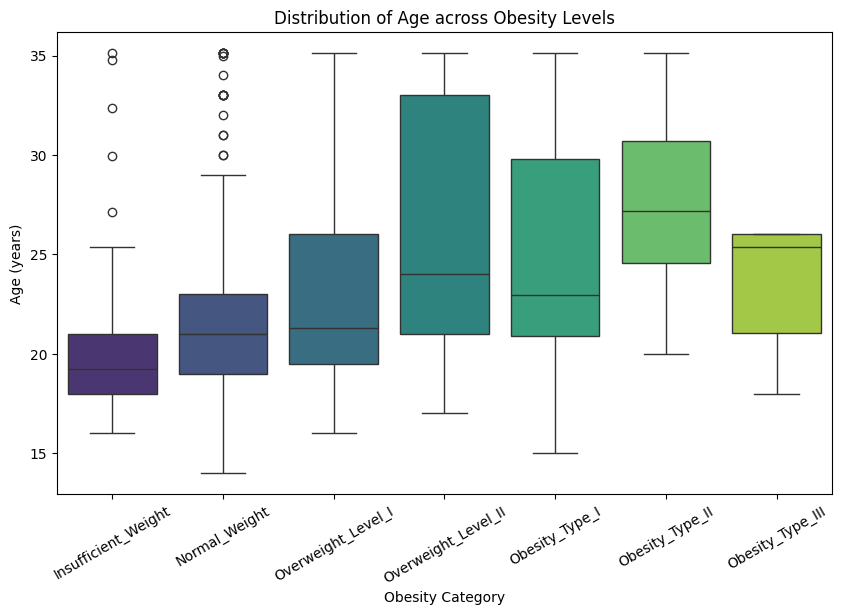

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='nobeyesdad', y='age', hue='nobeyesdad', palette='viridis', legend=False)
plt.title('Distribution of Age across Obesity Levels')
plt.xlabel('Obesity Category')
plt.ylabel('Age (years)')
plt.xticks(rotation=30)
plt.show()

### Findings and Interpretation

From the summary and visualization:
- Individuals with **insufficient or normal weight** tend to be **younger** on average.
- As the **obesity level increases**, the **median age** and **overall spread** of ages generally increase — indicating that older individuals are more likely to fall into higher obesity categories.
- The **moderate positive correlation (r = 0.284)** between **age** and **BMI** suggests that **age contributes to higher body weight** or **BMI**, possibly due to metabolic slowdown, lifestyle habits, or cumulative effects of diet over time.
- However, the pattern is **not strictly linear**, as seen in Obesity Type III, where the mean age slightly decreases — implying that severe obesity can also occur among younger individuals.

#### Summary

- Our findings indicate that **age is moderately associated with obesity** — older individuals tend to have higher BMI values and belong to higher obesity classes.
- However, since the correlation is not strong, **age alone does not fully explain obesity development**.
- This suggests that while aging may increase the likelihood of weight gain, **other lifestyle and behavioral factors** (such as diet, activity, or family history) also play crucial roles in influencing obesity outcomes.

##**EDA Q2: How does physical activity relate to obesity level**
In this part of our analysis, we explored the relationship between **physical activity frequency** (`FAF`) and **obesity level** (`nobeyesdad`).  

Our goal was to see whether individuals who engage in more frequent physical activity tend to have lower levels of obesity.

### Procedure

1. **Data Preparation**  
   - We used the variable `FAF`, which measures how often a person engages in physical activity per week.  
   - The `nobeyesdad` variable classifies individuals into weight categories, from *Insufficient Weight* to *Obesity Type III*.

2. **Measures of Central Tendency**  
   - We calculated the **mean** and **median** physical activity frequency (`FAF`) across different obesity levels to identify patterns.  
   - This helps us understand how activity frequency changes as obesity level increases.

   From the summary statistics, we observed that:
   - *Insufficient Weight* and *Normal Weight* groups had the **highest mean FAF** (≈1.25–1.27).  
   - *Obesity Type III* had the **lowest mean FAF** (≈0.66).  
   - There’s a gradual decline in average physical activity as obesity level increases.

3. **Correlation Analysis**  
   - We computed the **Pearson correlation** between `FAF` and `weight`.  
   - The correlation was **-0.057**, which indicates a **very weak negative relationship** between physical activity and weight.  

   This means that people who are more physically active *tend* to have slightly lower weights, but the relationship is not strong enough to be considered significant on its own.

4. **Visualization**  
   - We visualized this relationship using a **boxplot**, which shows the spread and median of `FAF` values across each obesity category.  
   - This allows us to observe how physical activity levels differ among groups.


### Measures of Central Tendency

In [ ]:
# Summary statistics of physical activity (faf) across obesity categories
faf_summary = df.groupby('nobeyesdad', observed=True)['faf'].describe().round(2)
display(faf_summary)

# Correlation between physical activity (faf) and weight
faf_weight_corr = df['faf'].corr(df['weight'])
print(f"Correlation between FAF (physical activity) and Weight: {faf_weight_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,1.27,0.85,0.0,0.50,1.37,2.00,3.0
Normal_Weight,282.0,1.25,1.02,0.0,0.00,1.00,2.00,3.0
Overweight_Level_I,276.0,1.06,0.87,0.0,0.26,1.00,1.77,3.0
Overweight_Level_II,290.0,0.96,0.82,0.0,0.12,0.96,1.44,3.0
Obesity_Type_I,351.0,0.99,0.89,0.0,0.02,0.99,1.69,3.0
Obesity_Type_II,297.0,0.97,0.58,0.0,0.58,0.99,1.38,2.0
Obesity_Type_III,324.0,0.66,0.73,0.0,0.00,0.22,1.46,2.0


Correlation between FAF (physical activity) and Weight: -0.057


#### Visualization

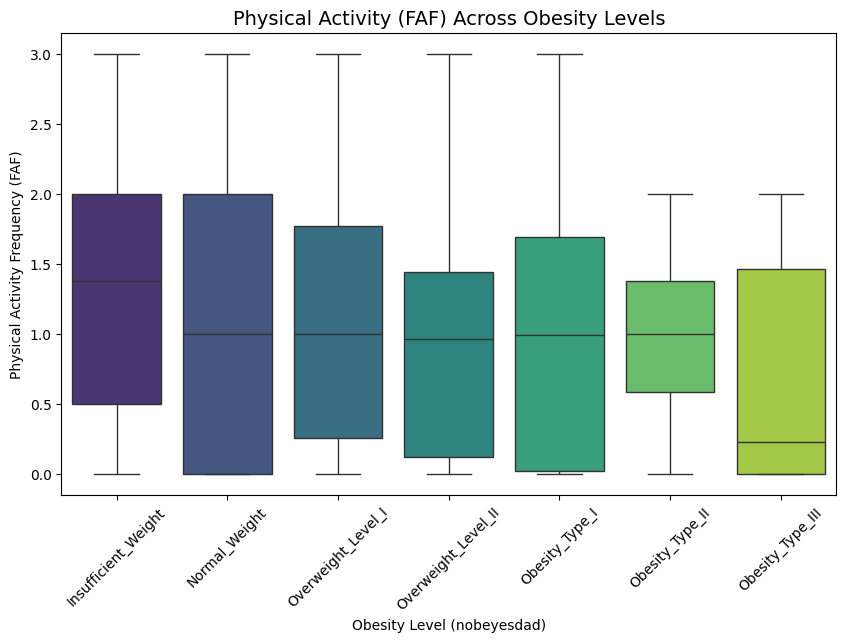

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='nobeyesdad', y='faf', data=df, hue='nobeyesdad', palette='viridis', legend=False)
plt.title("Physical Activity (FAF) Across Obesity Levels", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Physical Activity Frequency (FAF)")
plt.xticks(rotation=45)
plt.show()


### Findings and Interpretation

From the summary and visualization:
- People with **normal or insufficient weight** tend to engage in physical activity more frequently.  
- As obesity level increases, the **median and overall spread** of physical activity frequency decreases.
- The weak negative correlation (-0.057) suggests that while higher activity levels are slightly associated with lower weight, **other factors** likely play a more significant role in determining body weight.

### Summary

Given our dataset, we found that individuals with higher obesity levels tend to have **lower physical activity frequency**, but the effect is **not very strong** statistically.  

This suggests that while physical activity contributes to healthier weight management, it might not be enough alone to completely influence obesity outcome.


### EDA Q3: Relationship Between Physical Activity (FAF) and Obesity Level (nobeyesdad)
#### Objective
 To examine whether there is a relationship between physical activity frequency (FAF)
 and obesity levels (nobeyesdad) among respondents in the cleaned dataset.

### Measures of Central Tendency for Physical Activity (FAF)

In [ ]:
# Compute mean, median, and mode of FAF grouped by obesity level
faf_central_tendency = (
    df.groupby("nobeyesdad", observed=True)["faf"]
      .agg(["mean", "median", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan])
      .rename(columns={"<lambda_0>": "mode"})
      .round(2)
)

print("Measures of Central Tendency for Physical Activity (FAF) by Obesity Level:\n")
display(faf_central_tendency)

### Interpretation
- The mean and median values of physical activity (FAF) tend to decrease as obesity level increases.
This suggests that individuals in higher obesity categories generally engage in less frequent
physical activity compared to those with normal or insufficient weight.

- The mode values indicate the most common frequency of activity within each group,
which further supports this trend — showing that less active routines are more frequent
among participants with higher obesity levels.

### Measures of Central Tendency

In [ ]:
# Group the dataset by obesity level and summarize physical activity frequency
activity_summary = df.groupby("nobeyesdad", observed=True)["faf"].describe().round(2)
print("\nDescriptive Statistics for Physical Activity Frequency (FAF) by Obesity Level:\n")
display(activity_summary)

# Optional: calculate correlation between physical activity and BMI
faf_bmi_corr = df["faf"].corr(df["bmi"])
print(f"Correlation between Physical Activity (FAF) and BMI: {faf_bmi_corr:.3f}")


### Visualization

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="nobeyesdad", y="faf", palette="crest")
plt.title("Distribution of Physical Activity Frequency (FAF) by Obesity Level", fontsize=13)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Physical Activity Frequency (FAF)")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Interpretation
- The boxplot and descriptive statistics show a clear downward trend in physical activity
as obesity level increases.
- Individuals classified as Obesity Type I–III exhibit lower
median FAF values compared to those with Normal or Insufficient Weight.

- This suggests that lower physical activity frequency is associated with higher obesity levels.
- However, there are some overlapping ranges, indicating that activity alone does not fully
determine obesity status — diet and genetic factors may also contribute.
### Conclusion
- Overall, the analysis supports the notion that reduced physical activity correlates
with higher obesity classifications, reinforcing the importance of regular exercise
for maintaining healthy body weight

## **EDA Q4: Do people who monitor their calorie intake (SCC) tend to have lower weight or obesity levels?**

In this part of our analysis, we explored the relationship between **calorie monitoring habits** (`SCC_BIN`) and **obesity level** (`nobeyesdad`).  

Our goal was to determine whether individuals who monitor their calorie intake tend to maintain a healthier body weight classification.


###Procedure

1. **Data Preparation**  
   - We used the binary variable `SCC_BIN`, which indicates whether a person monitors their calorie intake (`1` for Yes, `0` for No`).
   - The variable `nobeyesdad` classifies individuals into categories ranging from *Insufficient Weight* to *Obesity Type III*.

2. **Measures of Central Tendency**  
   - Since `SCC_BIN` is binary, we used the **mean** as a representation of the proportion of people who monitor their calories.  
   - We grouped the dataset by `nobeyesdad` and calculated the mean of `SCC_BIN` to determine the proportion within each obesity category.

   The summary table shows:
   - *Overweight Level I* had the **highest proportion** of calorie monitoring (mean ≈ 0.13).  
   - *Obesity Type II* and *Obesity Type III* had **very low proportions** (mean ≈ 0.00).  
   - *Normal Weight* and *Insufficient Weight* groups had moderate calorie monitoring rates (around 0.08–0.11).

3. **Correlation Analysis**  
   - We computed the **Pearson correlation** between `SCC_BIN` and `weight`.  
   - The correlation result was **-0.205**, showing a **weak negative relationship** between calorie monitoring and weight.

   This means that people who track their calorie intake tend to have slightly lower weights.

4. **Visualization**  
   - To better understand the relationship, we created a **bar chart** showing the proportion of calorie monitoring across obesity levels.


### Measure of Central Tendency

In [ ]:
# Summary statistics of calorie monitoring across obesity levels
scc_summary = df.groupby('nobeyesdad', observed=True)['scc_bin'].describe().round(2)
display(scc_summary)

# Correlation between calorie monitoring and weight
scc_weight_corr = df['scc_bin'].corr(df['weight'])
print(f"Correlation between Calorie Monitoring (SCC_BIN) and Weight: {scc_weight_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,0.08,0.28,0.0,0.0,0.0,0.0,1.0
Normal_Weight,282.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0
Overweight_Level_I,276.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0
Overweight_Level_II,290.0,0.01,0.12,0.0,0.0,0.0,0.0,1.0
Obesity_Type_I,351.0,0.01,0.08,0.0,0.0,0.0,0.0,1.0
Obesity_Type_II,297.0,0.0,0.06,0.0,0.0,0.0,0.0,1.0
Obesity_Type_III,324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation between Calorie Monitoring (SCC_BIN) and Weight: -0.205


### Visualization

/tmp/ipython-input-318075864.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')
/tmp/ipython-input-318075864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')


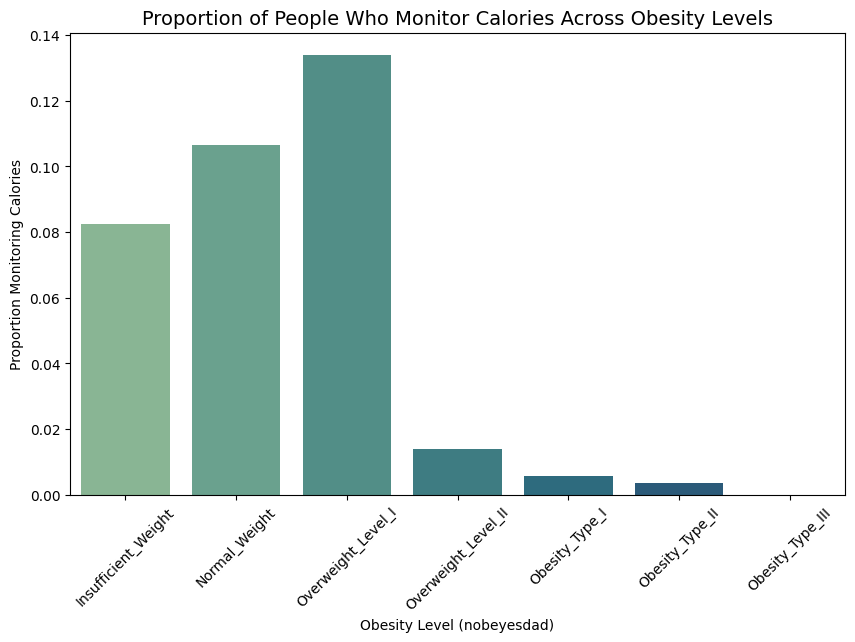

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')
plt.title("Proportion of People Who Monitor Calories Across Obesity Levels", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Proportion Monitoring Calories")
plt.xticks(rotation=45)
plt.show()



### Findings and Interpretation

From the results, we observed that:
- Individuals in *Overweight Level I* and *Normal Weight* categories are **more likely to monitor their calorie intake**.
- The frequency of calorie monitoring drops significantly among those in *Obesity Type II* and *III*.
- The weak negative correlation (-0.205) indicates that people who monitor their calories tend to maintain slightly lower body weights.

This suggests an **inverse relationship** between calorie monitoring and obesity:  
as obesity level increases, the tendency to track calorie intake decreases.

### Summary

Given our dataset, our findings suggest that calorie monitoring behavior is **linked to lower obesity levels**, though not as strong as expected.  
This means that while calorie tracking contributes to healthier weight management, it likely works alongside other factors.


# **Research Question**


## Which variation contributes most significantly to the rapid development of obesity compared to other influencing factors?

## Connection to Exploratory Data Analysis (EDA)

From our exploratory data analysis, we observed multiple factors that show varying degrees of association with obesity levels. Variables such as **physical activity frequency (FAF)**, **family history with overweight**, and **vegetable consumption frequency (FCVC)** each demonstrated distinct patterns when compared with obesity indicators like **weight** and **nobeyesdad** (obesity level classification).

For instance, individuals with **lower physical activity (FAF)** and **less frequent vegetable intake (FCVC)** generally exhibited **higher obesity levels**, while those with a **family history of overweight** showed a consistent tendency toward higher weight categories. These trends suggest that obesity is influenced by a complex interplay of lifestyle and hereditary factors.